*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall23/notebooks/module05_05_multi_class.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Multi-class classification

So far, our most accurate classifier, the SVM, was limited to binary classification problems.  In this notebook we will discuss several ways in which any binary classifier can be used to address multi-class classification problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To illustrate the different techniques we will use the 3rd and 4th features of the iris dataset:

In [2]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

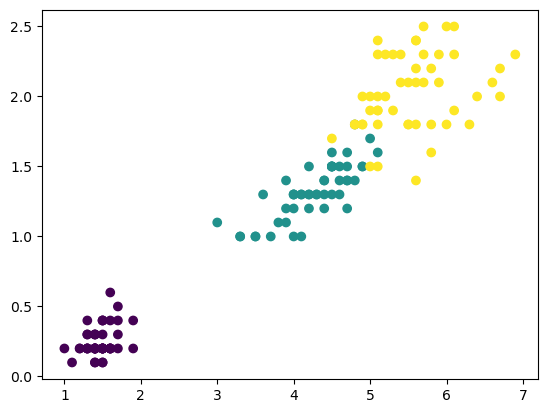

In [3]:
X = X[:, [2,3]]
plt.scatter(X[:,0],X[:, 1], c=y);

### Generic multi-class techniques

We will cover two generic techniques that can be used to convert any binary classifier into a multi-class classifier.

#### One-vs-the-rest

First, let's assume you have $C$ different classes in your data.  The idea behind one-vs-the-rest is to train $C$ binary classifiers, one for each class in the data.
To classify a test example, assign it to the class that receives the highest score.  Here's pseudo-code for the training procedure:

```
def one-vs-the-rest_train(classifier, X, y) :
    parameters :
       classifier - a binary classifier
       X - feature matrix
       y - labels, where each y[i] is between 0 and C-1
    for each class i in 0...C-1 :
        create a label vector where each example in class i is 
        a positive example and the rest are negative examples
        train a classifier on that dataset
```

And here's pseudo-code for the prediction procedure:

```
def one-vs-the-rest_predict(classifiers, x) :
    parameters:
        classifiers - a list of classifiers produced in the 
        training process
        x - a vector that needs to be classified
    call each classifier's decision_function method
    assign a class according to the class that receives the highest score
```

In [4]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [5]:
ovr = OneVsRestClassifier(SVC(kernel='linear'))

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy = cross_val_score(ovr, X, y, cv=cv, scoring='accuracy')
np.mean(accuracy)

0.9200000000000002

In [6]:
from matplotlib.colors import ListedColormap

def plot_boundary(classifier, X, y, axes = None) :
    """
    code based on:
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    """
    classifier.fit(X, y)
    # color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # create a two dimensional grid of points
    h = .02  # grid size
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # plot the predictions on the grid
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    

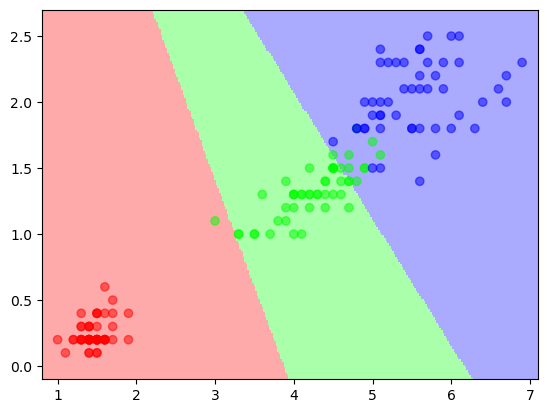

In [7]:
plot_boundary(ovr, X, y)

#### One-vs-one

The one-vs-one is similar to one-vs-the-rest, except that training is for each pair of classes, and when classifying an example you accumulate an example's scores over all possible combination and classify according to the class that receives the highest number of votes.


In [8]:
ovo = OneVsOneClassifier(SVC(kernel='linear'))

accuracy = cross_val_score(ovo, X, y, cv=cv, scoring='accuracy')
np.mean(accuracy)


0.9666666666666666

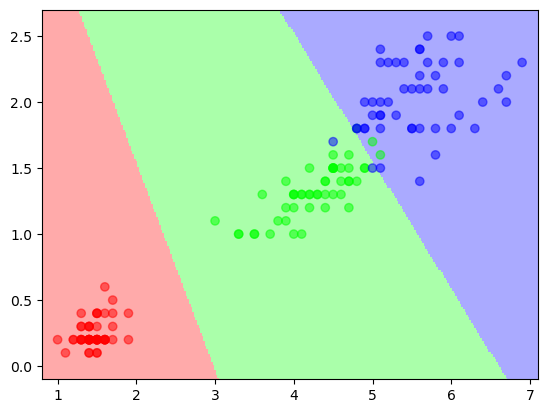

In [9]:
plot_boundary(ovo, X, y)